# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [60]:
from scipy import stats
import scipy.stats as scs
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import ttest_ind_from_stats

medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean and the standard deviation are calculated below. I am confused about the question on 'appropriateness of these statistics for the data.'

In [11]:
mean_medical = medical['charges'].mean()
print('Mean of Medical Charges:', mean_medical)

Mean of Medical Charges: 13270.422265141257


In [13]:
std_medical = medical['charges'].std()
print('Standard Deviation of Medical Charges:', std_medical)

Standard Deviation of Medical Charges: 12110.011236693994


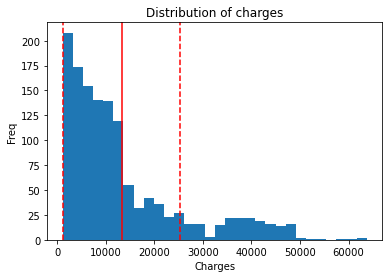

In [16]:
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Freq')
_ = plt.title('Distribution of charges')
_ = plt.axvline(13270, color='r')
_ = plt.axvline(13270+12110, color='r', linestyle='--')
_ = plt.axvline(13270-12110, color='r', linestyle='--')

plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I would justify that these data allow us to answer the question on the assumption that these data represent a random sample of charges because of the Central Limit Theorem (CLT). CLT tells us that the sampling distribution of the mean will approach a normal distribution as the size of n increases. We would take large samples of the data multiple times and use the frequestist test of normality (using pdf and cdf) to test the probability of the actual average charge falling below 12,000. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided interval would be the appropriate confidence interval in this case because we are interested in observing a statistic that is less than 12000.  

In [24]:
# We first take a large sample of the data many times.
for i in range(100):
    df_med = medical['charges'].sample(n=1000, random_state=1)

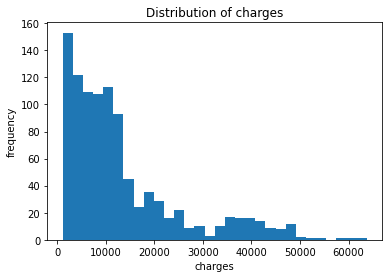

In [25]:
_ = plt.hist(df_med, bins=30)
_ = plt.xlabel('charges')
_ = plt.ylabel('frequency')
_ = plt.title('Distribution of charges')
plt.show()

In [26]:
mean_medsample = np.mean(df_med)
print('Mean of the sample:', mean_medsample)

Mean of the sample: 13164.96261114902


In [27]:
std_medsample = np.std(df_med)
print('S.D of the sample:', std_medsample)

S.D of the sample: 11834.082058509852


Since we are looking at a sample of the population and not the actual population, we will find the CI using a t-test.

In [32]:
# define probability (https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/)
p1 = 0.975
dof = len(df_med)-1
# retrieve value <= probability
value1 = t.ppf(p1, dof)
print(value)
# confirm with cdf
p2 = t.cdf(value1, dof)
print(p2)

1.959963984540054
0.9749999999999999


In [36]:
margin_of_error1 = value1 * (std_medsample/np.sqrt(1000))
print(margin_of_error1)

734.3602419982577


In [37]:
upper_of_interval = mean_medsample + margin_of_error1
lower_of_interval = mean_medsample - margin_of_error1

print('Upper of CI(t-distribution):', upper_of_interval)
print('Lower of CI(t-distribution):', lower_of_interval)

Upper of CI(t-distribution): 13899.322853147278
Lower of CI(t-distribution): 12430.602369150762


The administrator should not be concerned given the average charges falls between the CI of 12430 and 13899, which is not less than 12000. 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is: People with insurance are NOT charged a different amount than those without. The alternative hypothesis is: People with insurance are charged a different amount than those without. 
As we are given the pooled standard deviation, we are making the assumption that the variances of the two groups are the same. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [38]:
charges = medical['charges'].to_numpy()

In [39]:
insurance = medical['insuranceclaim'].to_numpy()

In [40]:
#mean and std.dev

mean_charges = np.mean(charges)
std_charges = np.std(charges)
mean_insurance = np.mean(insurance)
std_insurance = np.std(insurance)
print('Mean charges:', mean_charges)
print('Std.dev charges:', std_charges)
print('Mean insurance:', mean_insurance)
print('Std.dev insurance:', std_insurance)

Mean charges: 13270.422265141257
Std.dev charges: 12105.484975561612
Mean insurance: 0.5852017937219731
Std.dev insurance: 0.4926871769658293


In [61]:
#t-test on two independent samples 

ttest_ind_from_stats(mean1=mean_charges, std1=std_charges, nobs1=len(charges),
                     mean2=mean_insurance, std2=std_charges, nobs2=len(insurance))
# rng = np.random.default_rng()
# rvs_charges = stats.norm.rvs(loc=13720, scale=12105, size=1000, random_state=rng)
# rvs_insurance = stats.norm.rvs(loc=0.6, scale=0.5, size=1000, random_state=rng)
#stats.ttest_ind(charges, insurance, equal_var = False, alternative = 'two-sided')

#Why ttest_ind_from_stats versus ttest_ind

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [55]:
#Calculating the p-value manually
n0 = len(charges)
n1 = len(insurance)
s0_sq = std_charges**2
s1_sq = std_insurance**2

top_frac_a = (n0-1)*s0_sq
top_frac_b = (n1-1)*s1_sq

bottom_frac = (n0+n1) - 2

std_pooled_1 = (top_frac_a + top_frac_b)/bottom_frac

std_pooled = np.sqrt(std_pooled_1)

print(std_pooled)



8559.87052286098


In [56]:
#t-statistic
diff_means = mean_charges = mean_insurance
n0 = len(charges)
n1 = len(insurance)

sqrt = np.sqrt(1/n0 + 1/n1)

t = diff_means/(std_pooled*sqrt)
print(t)

0.0017682819423588268


We see that the t-statistic for the two are the same. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I believe I will be able to answer this question once I understand the difference between why we used ttest_ind_from_stats versus ttest_ind. Happy to work on this after discussing with my mentor. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test